# Preprocessing
## Stemming
* The first step in preprocessing is lowering case, removing stop words, and tokenization
* The next step in preprocessing is to standardise the text. One option for this is stemming, where words are reduced to their base form. For example, words like ‘connecting’ or ‘connected’ will be stemmed to the base form ‘connect’. Stemming works by removing suffix/ending of word but can sometimes lead to the base form not being meaningful or a proper word.


In [1]:
from nltk.stem import PorterStemmer

In [2]:
ps = PorterStemmer()
connect_tokens = ['connecting', 'connected', 'connectivity', 'connect', 'connects']
for t in connect_tokens:
    print(t, " : ", ps.stem(t))

connecting  :  connect
connected  :  connect
connectivity  :  connect
connect  :  connect
connects  :  connect


In [3]:
learn_tokens = ['learned', 'learning', 'learn', 'learns', 'learner', 'learners']
for t in learn_tokens:
    print(t, " : ", ps.stem(t))

learned  :  learn
learning  :  learn
learn  :  learn
learns  :  learn
learner  :  learner
learners  :  learner


In [4]:
likes_tokens = ['likes', 'better', 'worse']
for t in likes_tokens:
    print(t, " : ", ps.stem(t))

likes  :  like
better  :  better
worse  :  wors


## Lemmatization
* Where stemming removes the last few characters of a word, lemmatization stems the word to a more meaningful base form and ensures it does not lose it's meaning.
* Lemmatization works more intelligently, referencing a pre-defined dictionary containing the context of words and uses this when diminishing the word to the base form.

In [5]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
lemmatizer = WordNetLemmatizer()
for t in connect_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

connecting  :  connecting
connected  :  connected
connectivity  :  connectivity
connect  :  connect
connects  :  connects


In [7]:
for t in learn_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

learned  :  learned
learning  :  learning
learn  :  learn
learns  :  learns
learner  :  learner
learners  :  learner


In [8]:
for t in likes_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

likes  :  like
better  :  better
worse  :  worse


# N-grams
* An n-gram is simply a sequence of neighbouring n words (or tokens), where n can be any number.

In [9]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
tokens = ['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']
print(tokens)

['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']


In [11]:
# unigrams: n=1
unigrams = (pd.Series(nltk.ngrams(tokens, 1)).value_counts())
print(unigrams)

(to,)       7
(of,)       6
(the,)      4
(in,)       4
(and,)      3
           ..
(only,)     1
(set,)      1
(grow,)     1
(years,)    1
(come,)     1
Name: count, Length: 79, dtype: int64


Text(0.5, 0, '# of Occurances')

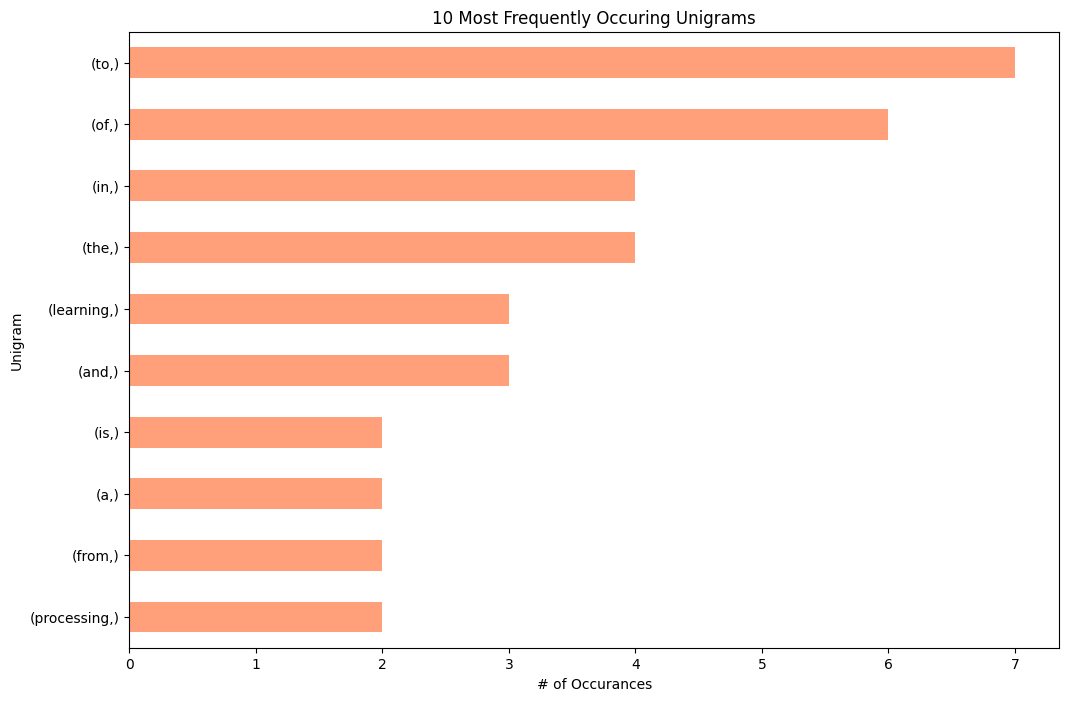

In [12]:
unigrams[0:10].sort_values().plot.barh(color='lightsalmon', width=.5, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

In [13]:
# bigrams: n=2
bigrams = (pd.Series(nltk.ngrams(tokens, 2)).value_counts())
print(bigrams)

(that, were)                  2
(rise, of)                    1
(of, artificial)              1
(artificial, intelligence)    1
(intelligence, has)           1
                             ..
(grow, in)                    1
(in, the)                     1
(the, years)                  1
(years, to)                   1
(to, come)                    1
Name: count, Length: 105, dtype: int64


# Example: Book Reviews

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
import pandas as pd

### Load data

In [17]:
data = pd.read_csv("book_reviews_sample.csv") # the data should be in the same folder as your notebook

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   100 non-null    int64 
 1   Review  100 non-null    object
 2   rating  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [19]:
data.head()

,index,Review,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [20]:
data['Review'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

### Lowercase

In [21]:
data['review_lowercase'] = data['Review'].str.lower()

In [22]:
data.head()

,index,Review,rating,review_lowercase
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny. a bit busy with all the diffe...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate. wha...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story. i read i...
3,10342,"Action, action, action! Equipment keeps gettin...",4,"action, action, action! equipment keeps gettin..."
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


### Stop word removal

In [26]:
import nltk
nltk.download('stopwords')
en_stopwords = stopwords.words('english')
en_stopwords.remove("not")
print(en_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
data['review_no_stopwords'] = data['review_lowercase'] \
                                .apply(lambda x: ' ' \
                                .join([word for word in x.split() if word not in (en_stopwords)]))

In [28]:
data.head()

,index,Review,rating,review_lowercase,review_no_stopwords
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny. a bit busy with all the diffe...,clean funny. bit busy different plots going on...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate. wha...,alex sexy hot cop phd candidate. match makes g...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story. i read i...,good thing free story. read years ago not wort...
3,10342,"Action, action, action! Equipment keeps gettin...",4,"action, action, action! equipment keeps gettin...","action, action, action! equipment keeps gettin..."
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,hands worse book ever read trst says alot


In [29]:
data['review_no_stopwords'][0]

'clean funny. bit busy different plots going on. overall good read. bye now.'

### Punctuation

In [30]:
data['review_no_stopwords_no_punct'] = data. \
                                    apply(lambda x: \
                                    re.sub(r"([^\w\s])", "", x['review_no_stopwords']), axis=1)

In [31]:
data.head()

,index,Review,rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny. a bit busy with all the diffe...,clean funny. bit busy different plots going on...,clean funny bit busy different plots going on ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate. wha...,alex sexy hot cop phd candidate. match makes g...,alex sexy hot cop phd candidate match makes gr...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story. i read i...,good thing free story. read years ago not wort...,good thing free story read years ago not worth...
3,10342,"Action, action, action! Equipment keeps gettin...",4,"action, action, action! equipment keeps gettin...","action, action, action! equipment keeps gettin...",action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,hands worse book ever read trst says alot,hands worse book ever read trst says alot


### Tokenizing

In [34]:
nltk.download('punkt_tab')
data['tokenized'] = data.apply(lambda x: \
                               word_tokenize(x['review_no_stopwords_no_punct']), axis=1)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [35]:
data.head()

,index,Review,rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,tokenized
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny. a bit busy with all the diffe...,clean funny. bit busy different plots going on...,clean funny bit busy different plots going on ...,"[clean, funny, bit, busy, different, plots, go..."
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate. wha...,alex sexy hot cop phd candidate. match makes g...,alex sexy hot cop phd candidate match makes gr...,"[alex, sexy, hot, cop, phd, candidate, match, ..."
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story. i read i...,good thing free story. read years ago not wort...,good thing free story read years ago not worth...,"[good, thing, free, story, read, years, ago, n..."
3,10342,"Action, action, action! Equipment keeps gettin...",4,"action, action, action! equipment keeps gettin...","action, action, action! equipment keeps gettin...",action action action equipment keeps getting b...,"[action, action, action, equipment, keeps, get..."
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,hands worse book ever read trst says alot,hands worse book ever read trst says alot,"[hands, worse, book, ever, read, trst, says, a..."


In [36]:
print(data['tokenized'][0])

['clean', 'funny', 'bit', 'busy', 'different', 'plots', 'going', 'on', 'overall', 'good', 'read', 'bye', 'now']


### Stemming

In [37]:
ps = PorterStemmer()

In [38]:
data["stemmed"] = data["tokenized"] \
                  .apply(lambda tokens: \
                  [ps.stem(token) \
                   for token in tokens])

In [39]:
data.head()

,index,Review,rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,tokenized,stemmed
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny. a bit busy with all the diffe...,clean funny. bit busy different plots going on...,clean funny bit busy different plots going on ...,"[clean, funny, bit, busy, different, plots, go...","[clean, funni, bit, busi, differ, plot, go, on..."
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate. wha...,alex sexy hot cop phd candidate. match makes g...,alex sexy hot cop phd candidate match makes gr...,"[alex, sexy, hot, cop, phd, candidate, match, ...","[alex, sexi, hot, cop, phd, candid, match, mak..."
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story. i read i...,good thing free story. read years ago not wort...,good thing free story read years ago not worth...,"[good, thing, free, story, read, years, ago, n...","[good, thing, free, stori, read, year, ago, no..."
3,10342,"Action, action, action! Equipment keeps gettin...",4,"action, action, action! equipment keeps gettin...","action, action, action! equipment keeps gettin...",action action action equipment keeps getting b...,"[action, action, action, equipment, keeps, get...","[action, action, action, equip, keep, get, blo..."
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,hands worse book ever read trst says alot,hands worse book ever read trst says alot,"[hands, worse, book, ever, read, trst, says, a...","[hand, wors, book, ever, read, trst, say, alot]"


In [40]:
print(data['stemmed'][0])

['clean', 'funni', 'bit', 'busi', 'differ', 'plot', 'go', 'on', 'overal', 'good', 'read', 'bye', 'now']


### Lemmatization

In [41]:
lemmatizer = WordNetLemmatizer()

In [42]:
data["lemmatized"] = data["tokenized"] \
                    .apply(lambda tokens: \
                    [lemmatizer.lemmatize(token) \
                     for token in tokens])

In [43]:
data['lemmatized']

,lemmatized
0,"[clean, funny, bit, busy, different, plot, goi..."
1,"[alex, sexy, hot, cop, phd, candidate, match, ..."
2,"[good, thing, free, story, read, year, ago, no..."
3,"[action, action, action, equipment, keep, gett..."
4,"[hand, worse, book, ever, read, trst, say, alot]"
...,...
95,"[love, author, read, book, again, disappoint]"
96,"[book, not, bad, like, storyline, sex, not, gr..."
97,"[part, series, read, loved, whole, series, als..."
98,"[finally, texas, newspaper, kindle, formatway,..."


In [44]:
data.head()

,index,Review,rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,tokenized,stemmed,lemmatized
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny. a bit busy with all the diffe...,clean funny. bit busy different plots going on...,clean funny bit busy different plots going on ...,"[clean, funny, bit, busy, different, plots, go...","[clean, funni, bit, busi, differ, plot, go, on...","[clean, funny, bit, busy, different, plot, goi..."
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate. wha...,alex sexy hot cop phd candidate. match makes g...,alex sexy hot cop phd candidate match makes gr...,"[alex, sexy, hot, cop, phd, candidate, match, ...","[alex, sexi, hot, cop, phd, candid, match, mak...","[alex, sexy, hot, cop, phd, candidate, match, ..."
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story. i read i...,good thing free story. read years ago not wort...,good thing free story read years ago not worth...,"[good, thing, free, story, read, years, ago, n...","[good, thing, free, stori, read, year, ago, no...","[good, thing, free, story, read, year, ago, no..."
3,10342,"Action, action, action! Equipment keeps gettin...",4,"action, action, action! equipment keeps gettin...","action, action, action! equipment keeps gettin...",action action action equipment keeps getting b...,"[action, action, action, equipment, keeps, get...","[action, action, action, equip, keep, get, blo...","[action, action, action, equipment, keep, gett..."
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,hands worse book ever read trst says alot,hands worse book ever read trst says alot,"[hands, worse, book, ever, read, trst, says, a...","[hand, wors, book, ever, read, trst, say, alot]","[hand, worse, book, ever, read, trst, say, alot]"


## N-grams

In [45]:
tokens_clean = sum(data['lemmatized'], [])  # flattens the tokens
print(tokens_clean)

['clean', 'funny', 'bit', 'busy', 'different', 'plot', 'going', 'on', 'overall', 'good', 'read', 'bye', 'now', 'alex', 'sexy', 'hot', 'cop', 'phd', 'candidate', 'match', 'make', 'great', 'fun', 'exciting', 'book', 'good', 'thing', 'free', 'story', 'read', 'year', 'ago', 'not', 'worth', 'time', 'action', 'action', 'action', 'equipment', 'keep', 'getting', 'blown', 'up', 'hero', 'live', 'on', 'hand', 'worse', 'book', 'ever', 'read', 'trst', 'say', 'alot', 'great', 'book', 'packed', 'full', 'fast', 'car', 'crazy', 'hot', 'men', 'danger', 'oh', 'yes', 'great', 'sex', 'enjoyed', 'reader', 'digest', 'much', 'could', 'figure', 'get', 'kinkle', 'would', 'series', 'good', 'look', 'forward', 'writes', 'great', 'way', 'word', 'could', 'not', 'get', 'booki', 'way', 'read', 'book', 'start', 'one', 'could', 'not', 'good', 'see', 'dan', 'elle', 'wa', 'still', 'together', 'much', 'love', 'let', 'down', 'not', 'think', 'worth', 'money', 'spent', 'all', 'nothing', 'seemed', 'real', 'value', 'not', 'care

In [46]:
# unigrams: n=1
unigrams = (pd.Series \
            (nltk.ngrams(tokens_clean, 1)) \
            .value_counts())
print(unigrams)

(book,)         58
(not,)          53
(read,)         37
(good,)         27
(story,)        16
                ..
(formatway,)     1
(amazon,)        1
(tj,)            1
(jon,)           1
(christine,)     1
Name: count, Length: 421, dtype: int64


In [47]:
# bigrams: n=2
bigrams = (pd.Series \
           (nltk.ngrams(tokens_clean, 2)) \
           .value_counts())
print(bigrams)

(not, like)          7
(great, book)        6
(hay, hay)           6
(read, book)         5
(book, not)          5
                    ..
(put, down)          1
(not, care)          1
(care, ebook)        1
(finish, reading)    1
(writing, it)        1
Name: count, Length: 834, dtype: int64


In [48]:
ngrams_3 = (pd.Series \
            (nltk.ngrams(tokens_clean, 3)) \
            .value_counts())
print(ngrams_3)

(hay, hay, hay)            5
(done, done, done)         3
(not, cup, tea)            3
(not, worth, time)         2
(it, not, like)            2
                          ..
(author, truly, gifted)    1
(truly, gifted, pen)       1
(gifted, pen, book)        1
(pen, book, kept)          1
(read, total, waste)       1
Name: count, Length: 909, dtype: int64


* This gives a nice idea of topics and themes that are coming up in the data, without requiring difficult
or time consuming analysis.
* This is really useful to get a feel for what is in your data, to check your pre-processing, and to
gain a good understanding of the dataset before moving on to any kind of advanced analysis.



# POS Tagging
### POS (Part of Speech) Tagging is used in NLP as
* Syntactic analysis (parsing)
  * Helps understand sentence structure (who did what to whom).
  * Example: identifying the subject, verb, and object in a sentence.
* Word sense disambiguation
  * Helps determine the correct meaning of a word based on its role.
  * Example: “book a flight” (verb) vs. “read a book” (noun).
* Named Entity Recognition (NER)
 * Helps identify names, places, and organizations — e.g., POS helps detect that “Apple” can be a proper noun, not a fruit.
* Machine translation & speech recognition
  * Improves grammar and meaning when converting between languages.
* Lemmatization
  * To reduce words to their base (dictionary) form, the POS is needed.
  * Example:
    * “running” → “run” (verb)
    * “better” → “good” (adjective)

## Example

In [50]:
import spacy
print(spacy.__version__)

3.8.8


* Spacy is one of the most popular NLP libraries.
* It comes with pre-trained models that can recognize parts of speech, Named entities and other linguistic features right out of the box.

In [51]:
import pandas as pd

In [52]:
nlp = spacy.load('en_core_web_sm')
# if you are running this for the first time, or recieve an error "Can't find model 'en_core_web_sm'",
# then please run the follwing in your terminal: python -m spacy download en_core_web_sm

In [53]:
# our text is from jane austin's 'emma'
# we have removed punctuation, lowercased but left in stop words
emma_ja = "emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of authority being now long passed away they had been living together as friend and friend very mutually attached and emma doing just what she liked highly esteeming miss taylors judgment but directed chiefly by her own"
print(emma_ja)

emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of auth

In [54]:
# create a spacy doc from our text - this will generate tokens and their assosciated pos tags
spacy_doc = nlp(emma_ja)

In [55]:
# extract the tokens and pos tags into a dataframe
pos_df = pd.DataFrame(columns=['token', 'pos_tag'])

In [56]:
# Collect data in a list
token_list = []
for token in spacy_doc:
    token_list.append({'token': token.text, 'pos_tag': token.pos_})

# Create DataFrame once
pos_df = pd.DataFrame(token_list)

In [57]:
pos_df.head(15)

,token,pos_tag
0,emma,PROPN
1,woodhouse,PROPN
2,handsome,ADJ
3,clever,ADJ
4,and,CCONJ
5,rich,ADJ
6,with,ADP
7,a,DET
8,comfortable,ADJ
9,home,NOUN


In [58]:
# token frequency count
pos_df_counts = pos_df.groupby(['token','pos_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
pos_df_counts.head(10)

,token,pos_tag,counts
88,of,ADP,14
54,her,PRON,9
49,had,AUX,9
6,and,CCONJ,8
111,the,DET,8
0,a,DET,6
114,to,PART,5
61,in,ADP,4
120,very,ADV,4
13,been,AUX,4


In [59]:
# counts of pos_tags
pos_df_poscounts = pos_df_counts.groupby(['pos_tag']).size().sort_values(ascending=False)
pos_df_poscounts.head(10)

,0
pos_tag,
NOUN,35
VERB,19
ADJ,18
ADV,18
PRON,9
ADP,8
PROPN,6
DET,5
AUX,4


In [60]:
# see most common nouns
nouns = pos_df_counts[pos_df_counts.pos_tag == "NOUN"][0:10]
nouns

,token,pos_tag,counts
48,governess,NOUN,3
46,friend,NOUN,3
130,years,NOUN,2
28,daughters,NOUN,2
35,emma,NOUN,2
82,mother,NOUN,2
103,sisters,NOUN,2
1,affection,NOUN,1
11,authority,NOUN,1
32,distress,NOUN,1


In [61]:
# see most common adjectives
verbs = pos_df_counts[pos_df_counts.pos_tag == "ADJ"][0:10]
verbs

,token,pos_tag,counts
70,little,ADJ,2
2,affectionate,ADJ,1
34,early,ADJ,1
44,fond,ADJ,1
39,excellent,ADJ,1
51,happy,ADJ,1
16,best,ADJ,1
25,clever,ADJ,1
26,comfortable,ADJ,1
63,indulgent,ADJ,1


## Named Entity Recognition
* Named entity recognition is the process of finding and labeling essential pieces of information in text, such as names of people, places, organizations, dates, or quantities.
* NER uses a combination of rules and machine learning to discover the entities
* The model also looks at the surrounding context, word patterns, and statistical probabilities.
### Main uses of NER in NLP
1. Information Extraction
   * Pulling out structured information from unstructured text.
   * Example: from a news article, extract who did what where.
2. Search and Recommendation Systems
   * Helps search engines understand queries like
     “novels written by Jane Austin” (recognizes “Jane Austin” as a person).
3. Question Answering and Chatbots
   * When a user asks “What’s the weather in Tokyo?”, NER helps detect “Tokyo” as a location.
4. ...


In [63]:
import spacy
from spacy import displacy
from spacy import tokenizer
import re
nlp = spacy.load('en_core_web_sm')

In [64]:
google_text = "Google was founded on September 4, 1998, by computer scientists Larry Page and Sergey Brin while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed shares and control 56% of its stockholder voting power through super-voting stock. The company went public via an initial public offering (IPO) in 2004. In 2015, Google was reorganized as a wholly owned subsidiary of Alphabet Inc. Google is Alphabet's largest subsidiary and is a holding company for Alphabet's internet properties and interests. Sundar Pichai was appointed CEO of Google on October 24, 2015, replacing Larry Page, who became the CEO of Alphabet. On December 3, 2019, Pichai also became the CEO of Alphabet."
print(google_text)

Google was founded on September 4, 1998, by computer scientists Larry Page and Sergey Brin while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed shares and control 56% of its stockholder voting power through super-voting stock. The company went public via an initial public offering (IPO) in 2004. In 2015, Google was reorganized as a wholly owned subsidiary of Alphabet Inc. Google is Alphabet's largest subsidiary and is a holding company for Alphabet's internet properties and interests. Sundar Pichai was appointed CEO of Google on October 24, 2015, replacing Larry Page, who became the CEO of Alphabet. On December 3, 2019, Pichai also became the CEO of Alphabet.


In [65]:
spacy_doc = nlp(google_text)

In [66]:
for word in spacy_doc.ents:
    print(word.text,word.label_)

Google ORG
September 4, 1998 DATE
Larry Page PERSON
Sergey Brin PERSON
PhD WORK_OF_ART
Stanford University ORG
California GPE
about 14% PERCENT
56% PERCENT
IPO ORG
2004 DATE
2015 DATE
Google ORG
Alphabet Inc. ORG
Alphabet ORG
Alphabet ORG
Sundar Pichai PERSON
Google ORG
October 24, 2015 DATE
Larry Page PERSON
Alphabet GPE
December 3, 2019 DATE
Pichai PERSON
Alphabet GPE


In [67]:
displacy.render(spacy_doc,style="ent",jupyter=True)

**...let's see if cleaning our text up a little bit improves the tagging**

In [68]:
google_text_clean = re.sub(r'[^\w\s]', '', google_text).lower() # remove punctuation and lowercase
print(google_text_clean)

google was founded on september 4 1998 by computer scientists larry page and sergey brin while they were phd students at stanford university in california together they own about 14 of its publicly listed shares and control 56 of its stockholder voting power through supervoting stock the company went public via an initial public offering ipo in 2004 in 2015 google was reorganized as a wholly owned subsidiary of alphabet inc google is alphabets largest subsidiary and is a holding company for alphabets internet properties and interests sundar pichai was appointed ceo of google on october 24 2015 replacing larry page who became the ceo of alphabet on december 3 2019 pichai also became the ceo of alphabet


In [69]:
spacy_doc_clean = nlp(google_text_clean)

In [70]:
for word in spacy_doc_clean.ents:
    print(word.text,word.label_)

google ORG
september 4 1998 DATE
stanford university ORG
california GPE
about 14 CARDINAL
56 CARDINAL
2004 DATE
2015 DATE
alphabet inc google ORG
google ORG
october 24 2015 DATE
larry PERSON
december 3 2019 DATE


* POS tagging and NER can be used to gain deeper insight into our text data.
* These techniques help us understand what kinds of words appear in our data set, what they represent,
and how they relate to the topics being discussed.

# Rule-based Sentiment Analysis
* Sentiment analysis is a really popular technique in NLP for discovering the underlying emotional tone of the text, whether that be positive, negative or neutral.
* This type of analysis is really useful when you're interested in getting a quick understanding of how people view certain things.

### Textblob

In [71]:
!pip install TextBlob

In [72]:
from textblob import TextBlob

In [73]:
sentence_1 = "i had a great time at the movie it was really funny"
sentence_2 = "i had a great time at the movie but the parking was terrible"
sentence_3 = "i had a great time at the movie but the parking wasn't great"
sentence_4 = "i went to see a movie"

In [74]:
print(sentence_1)
sentiment_score = TextBlob(sentence_1)
print(sentiment_score.sentiment.polarity)

i had a great time at the movie it was really funny
0.525


TextBlob returns a score between -1 and 1, where negative scores indicate negative sentiment, and positive scores indicate positive sentiment.

In [75]:
print(sentence_2)
sentiment_score_2 = TextBlob(sentence_2)
print(sentiment_score_2.sentiment.polarity)

i had a great time at the movie but the parking was terrible
-0.09999999999999998


In [76]:
print(sentence_3)
sentiment_score_3 = TextBlob(sentence_3)
print(sentiment_score_3.sentiment.polarity)

i had a great time at the movie but the parking wasn't great
0.8


In [77]:
print(sentence_4)
sentiment_score_4 = TextBlob(sentence_4)
print(sentiment_score_4.sentiment.polarity)

i went to see a movie
0.0


### VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [78]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [80]:
vader_sentiment = SentimentIntensityAnalyzer()

In [81]:
print(sentence_1)
print(vader_sentiment.polarity_scores(sentence_1))

i had a great time at the movie it was really funny
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.807}


The compond score gives us the overall score for the text and is scored the same as TextBlob between -1 and 1.

In [82]:
print(sentence_2)
print(vader_sentiment.polarity_scores(sentence_2))

i had a great time at the movie but the parking was terrible
{'neg': 0.234, 'neu': 0.621, 'pos': 0.144, 'compound': -0.3818}


In [83]:
print(sentence_3)
print(vader_sentiment.polarity_scores(sentence_3))

i had a great time at the movie but the parking wasn't great
{'neg': 0.247, 'neu': 0.611, 'pos': 0.142, 'compound': -0.4387}


In [84]:
print(sentence_4)
print(vader_sentiment.polarity_scores(sentence_4))

i went to see a movie
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


# Pre-trained Transformer Models

In [85]:
!pip install transformers

In [86]:
import transformers
from transformers import pipeline

In [88]:
import torch

In [89]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


* Note that the default model is selected and it does not use GPU

In [90]:
print(sentence_1)
sentiment_pipeline(sentence_1)

i had a great time at the movie it was really funny


[{'label': 'POSITIVE', 'score': 0.9998176693916321}]

In [91]:
print(sentence_2)
sentiment_pipeline(sentence_2)

i had a great time at the movie but the parking was terrible


[{'label': 'NEGATIVE', 'score': 0.9977464079856873}]

In [92]:
print(sentence_3)
sentiment_pipeline(sentence_3)

i had a great time at the movie but the parking wasn't great


[{'label': 'NEGATIVE', 'score': 0.9984902143478394}]

In [93]:
print(sentence_4)
sentiment_pipeline(sentence_4)

i went to see a movie


[{'label': 'POSITIVE', 'score': 0.9802700281143188}]

* sentence 4 is misclassified by the pre-trained transformer

In [94]:
# Using a different model
specific_model = pipeline("sentiment-analysis",
    model = "finiteautomata/bertweet-base-sentiment-analysis")

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [95]:
print(sentence_4)
specific_model(sentence_4)

i went to see a movie


[{'label': 'NEU', 'score': 0.9007399082183838}]

# Sentiment Analysis: Book review

In [96]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [97]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import chain
from nltk import NaiveBayesClassifier

In [98]:
data = pd.read_csv("book_reviews_sample.csv") # the data should be in the same folder as your notebook
data.head()

,index,Review,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [99]:
data['Review'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

## Data cleaning

In [100]:
data['reviewText_clean'] = data['Review'].str.lower()
data['reviewText_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])", "",
                        x['reviewText_clean']), axis=1) # remove punctuation

* Note that the stop words are not removed.

In [101]:
data.head()

,index,Review,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


### Rule-based sentiment with VADER

In [102]:
vader_sentiment = SentimentIntensityAnalyzer()

In [103]:
data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review))[0]

{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.7684}

In [104]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])

In [105]:
data.head()

,index,Review,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [106]:
# create labels for positive, negative, and neutral reviews
bins = [-1, -0.2, 0.2, 1]
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

In [107]:
data['vader_sentiment_label']

,vader_sentiment_label
0,positive
1,positive
2,positive
3,positive
4,negative
...,...
95,positive
96,neutral
97,positive
98,neutral


<Axes: xlabel='vader_sentiment_label'>

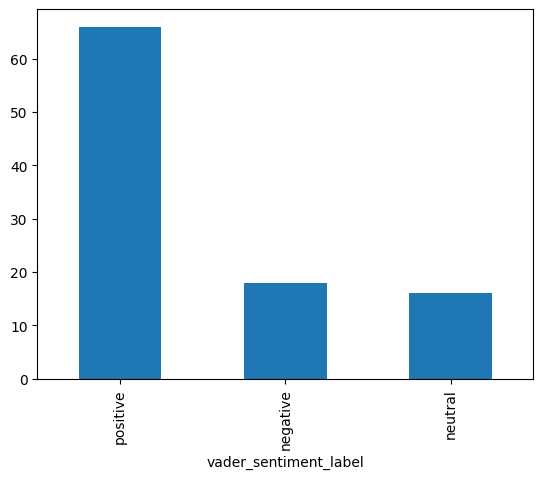

In [108]:
data['vader_sentiment_label'].value_counts().plot.bar()

### Pre-trained Transformer Model

In [109]:
transformer_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [110]:
transformer_labels = []

for review in data['reviewText_clean'].values:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)

data['transformer_sentiment_label'] = transformer_labels

In [111]:
data.head()

,index,Review,rating,reviewText_clean,vader_sentiment_score,vader_sentiment_label,transformer_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive,[POSITIVE]
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive,[POSITIVE]
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive,[NEGATIVE]
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive,[NEGATIVE]
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative,[NEGATIVE]


In [112]:
data['Review'][2]

'Good thing that this is a free story. I read it a few years ago and it is not worth the time.'

In [113]:
data['Review'][3]

'Action, action, action! Equipment keeps getting blown up, but the heroes live on and on.'

<Axes: xlabel='transformer_sentiment_label'>

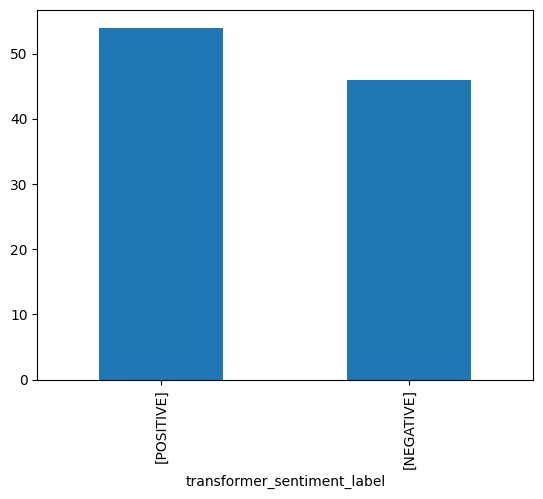

In [114]:
data['transformer_sentiment_label'].value_counts().plot.bar()

# Homework
## Sentiment Analysis (70)
1. Apply the rule-based VADER to the 1000 movie comments data to show the results.
   * Show its accuracy and confusion matrix
   * Suggest an improvement
2. Apply the Pre-trained Transformer Model to the 1000 movie comments data to show the results
   * Show its accuracy and confusion matrix
   * Suggest an improvement
* Clean the review data before applying the sentiment analysis tools.
* Submit both this Jupyter notebook file that shows your code and execution results, and a Word file that explains the performance of the two sentiment analysis tools
## Final project (30)
* Add technical approach and implementation plan for your final project. Be specific on how to get the data, and which tool and platform to use. Make your document in Word format that should be at least two pages (over 1000 words).


# question:- 1)
Rule-Based VADER Sentiment Analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ VADER Sentiment Analysis Results:
Accuracy: 0.6400

Confusion Matrix:
 [[15  6 16]
 [ 2  4 11]
 [ 1  0 45]]


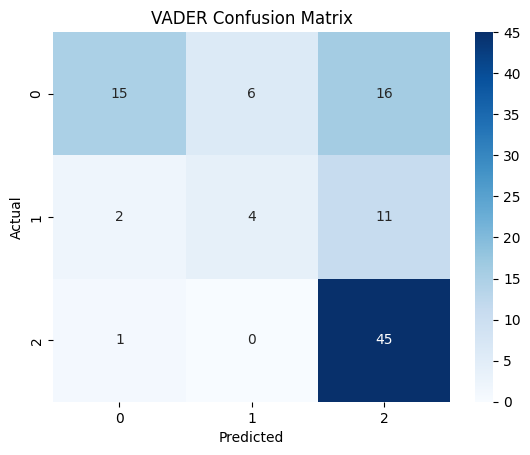

In [117]:
# Step 1: Rule-based VADER Sentiment Analysis

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load your dataset
df = pd.read_csv('book_reviews_sample.csv')

# Clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Remove stopwords except 'not'
en_stopwords = stopwords.words('english')
if "not" in en_stopwords:
    en_stopwords.remove("not")

df['clean_text'] = df['Review'].apply(clean_text)

# Apply VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = sid.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_pred'] = df['clean_text'].apply(get_vader_sentiment)

# Assuming you have a 'rating' column that can be mapped to sentiment labels for evaluation
# For simplicity, let's map ratings: 1,2 -> negative, 3 -> neutral, 4,5 -> positive
# This part needs to be adjusted based on the actual 'label' or 'rating' definition in your homework

def map_rating_to_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['true_sentiment_label'] = df['rating'].apply(map_rating_to_sentiment)

# Evaluate accuracy (assuming your dataset has a column 'label')
acc_vader = accuracy_score(df['true_sentiment_label'], df['vader_pred'])
cm_vader = confusion_matrix(df['true_sentiment_label'], df['vader_pred'])

print("✅ VADER Sentiment Analysis Results:")
print(f"Accuracy: {acc_vader:.4f}")
print("\nConfusion Matrix:\n", cm_vader)

# Visualize confusion matrix
sns.heatmap(cm_vader, annot=True, fmt='d', cmap='Blues')
plt.title("VADER Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# question:- 2)
Pre-trained Transformer Sentiment Analysis


In [2]:
# ✅ Create 1000 movie comments dataset for sentiment analysis
import pandas as pd
from datasets import load_dataset

# Load IMDB dataset
dataset = load_dataset("imdb")

# Use only the training split
train_data = dataset["train"]

# Select 500 Good (label=1) and 500 Bad (label=0) reviews
good_comments = train_data.filter(lambda x: x["label"] == 1).select(range(500))
bad_comments = train_data.filter(lambda x: x["label"] == 0).select(range(500))

# Convert to DataFrame
comments = pd.DataFrame({
    "comment": list(good_comments["text"]) + list(bad_comments["text"]),
    "label": ["Good"] * 500 + ["Bad"] * 500
})

# Shuffle the dataset
comments = comments.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
comments.to_csv("movie_comments_dataset.csv", index=False)

print("✅ Dataset created successfully and saved as 'movie_comments_dataset.csv'")
print(comments.head())


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

✅ Dataset created successfully and saved as 'movie_comments_dataset.csv'
                                             comment label
0  1st watched 8/3/2003 - 2 out of 10(Dir-Brad Sy...   Bad
1  There's one line that makes it worth to rent f...   Bad
2  In an attempt to bring back the teen slasher g...   Bad
3  Not a `woman film' but film for the gang. One ...   Bad
4  Alexandr "Sascha" Luzhin (John Turturro) is a ...  Good


In [5]:
import pandas as pd
comments = pd.read_csv("movie_comments_dataset.csv")
print(comments.head())


                                             comment label
0  1st watched 8/3/2003 - 2 out of 10(Dir-Brad Sy...   Bad
1  There's one line that makes it worth to rent f...   Bad
2  In an attempt to bring back the teen slasher g...   Bad
3  Not a `woman film' but film for the gang. One ...   Bad
4  Alexandr "Sascha" Luzhin (John Turturro) is a ...  Good


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dataset loaded successfully!
                                             comment label
0  1st watched 8/3/2003 - 2 out of 10(Dir-Brad Sy...   Bad
1  There's one line that makes it worth to rent f...   Bad
2  In an attempt to bring back the teen slasher g...   Bad
3  Not a `woman film' but film for the gang. One ...   Bad
4  Alexandr "Sascha" Luzhin (John Turturro) is a ...  Good
Loading pre-trained model...


Device set to use cpu



✅ Transformer (BERT) Sentiment Analysis Results:
Accuracy: 0.8140

Confusion Matrix:
 [[365 135]
 [ 51 449]]


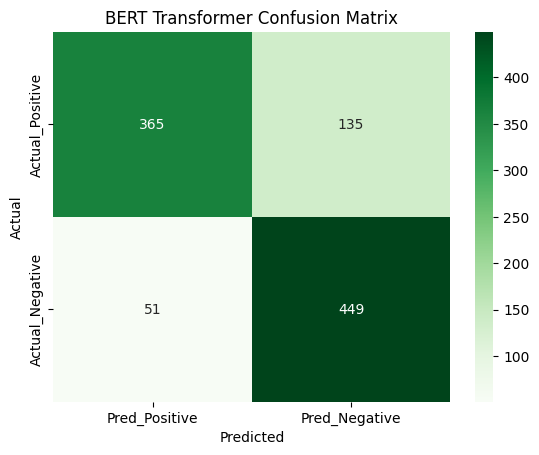


Summary:
The pre-trained Transformer (DistilBERT) model analyzes context and word relationships to predict sentiment.
Compared to rule-based VADER, it generally performs better at understanding negation and context.
To further improve results, fine-tune the model on this specific movie-review dataset.


In [10]:
# Step 2: Pre-trained Transformer (BERT) Sentiment Analysis

import pandas as pd
import re
from transformers import pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Optional: download nltk stopwords if you want to reuse from Step 1
nltk.download('stopwords')

# -------------------------------
# 1. Load Dataset
# -------------------------------
df = pd.read_csv('movie_comments_dataset.csv')   # Make sure this file has 'comment' and 'label' columns

print("Dataset loaded successfully!")
print(df.head())

# -------------------------------
# 2. Clean the Text Data
# -------------------------------
def clean_text(text):
    text = str(text).lower()                 # convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)     # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip() # remove extra spaces
    return text

df['clean_text'] = df['comment'].apply(clean_text)

# -------------------------------
# 3. Load Pre-trained Transformer (DistilBERT)
# -------------------------------
print("Loading pre-trained model...")
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

# -------------------------------
# 4. Apply Model to Each Cleaned Review
# -------------------------------
df['bert_pred'] = df['clean_text'].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'].lower())

# -------------------------------
# 5. Standardize Labels for Comparison
# -------------------------------
# Your dataset labels are "Good" and "Bad", so map them to match BERT outputs
df['label_mapped'] = df['label'].str.lower().map({'good': 'positive', 'bad': 'negative'})

# -------------------------------
# 6. Evaluate Performance
# -------------------------------
acc_bert = accuracy_score(df['label_mapped'], df['bert_pred'])
cm_bert = confusion_matrix(df['label_mapped'], df['bert_pred'], labels=['positive', 'negative'])

print("\n✅ Transformer (BERT) Sentiment Analysis Results:")
print(f"Accuracy: {acc_bert:.4f}")
print("\nConfusion Matrix:\n", cm_bert)

# -------------------------------
# 7. Visualize the Confusion Matrix
# -------------------------------
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred_Positive', 'Pred_Negative'],
            yticklabels=['Actual_Positive', 'Actual_Negative'])
plt.title("BERT Transformer Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------------
# 8. Summary for Report
# -------------------------------
print("\nSummary:")
print("The pre-trained Transformer (DistilBERT) model analyzes context and word relationships to predict sentiment.")
print("Compared to rule-based VADER, it generally performs better at understanding negation and context.")
print("To further improve results, fine-tune the model on this specific movie-review dataset.")
